# Optimization and Root Finding

#### Optimization is a process of finding the best solution to a problem to the extent where it can not be resonably improved by any further solutions.The best solution for optimization is found by adjusting variables and parameters until we achieve maximum desirable attributes and minimum undesirable ones. Maximum and minimum values are the common goals of optimization. It is widely used in various field which includes molecular simulations, regression analysis and various machine learning algorithms. 

####  While performing the optimizations task, we try to find the maximum and minimum of a given mathematical function. For example, if we seek to minimize a function $f(a,b)$, our main goal will be to find the values for input variables $a$ and $b$ to generate the smallest possible output from the function $f$. One approach for doing this is to manually try different input values until we get the smallest possible outputs. This can be tedious and time-consuming task so we can use computer to reduce time and make it easier. We use  `scipy.optimize`sub-package module of the SciPy library as it contains a number of function for performing optimizations of mathematical functions. In this project we will introduce `scipy.optimize` module and apply it to chemical applications. We will not deeply discuss about deeper theory behind optimization in this project. 

#### Before continuing, we need to find the way to measure what is "best"?. For this, we will use a cost function also known called as objective function. Cost function is a mathematical function that maps the difference between the predicted output of a model and its actual output. The cost function measures the "goodness" of the model's prediction and is used to guide the optimization of the model's parameters. Optimization of a molecule's conformation involves minimizing the energy, so the objective function here is the function that calculates the energy of the molecules based on the attributes like bond angles and lengths. In the examples discussed below, each of the `scipy.optimize` functions takes as its first argument an objective function in the form of a Python function. 

#### `scipy.optimize.func(obj_func)`
#### The examples in this project assume the following imports from NumPy, SciPy, pandas, and matplotlib.

In [3]:
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
np.random.seed(18)

## Minimization

#### Minimization is the process of finding the minimum value of a given objective function. For the minimization, `scipy.optimize` has two related function `scipy.optimize.minimize()` and `scipy.optimize.minimize_scalar`. Both functions minimize the given function, but the differenence is in the number of independent variables that the objective function takes. A function that has only one independent variable such as $f(a)$ is called a univariant function, while a function that takes multiple independent variables such as $f(a,b,...)$ is called a multivariant function. The `minimize()` can minimize both univariant and multivariant objective functions while `minimize_scalar()` can only handle univariant objective functions. 

 

### Univariant Minimization

#### Univariate minimization is a method for finding the minimum value of a univariate function, i.e. a function that depends on only one variable. So if we are trying to minimize a function with a single independent variable, the `scipy.optimize.minimize_scalar()` is good. For example, we will find the radius of minimal energy for two xenon atoms using the Lennard-Jones equation below which describes the potential energy with respect to the distance as $r$, between the two atoms with a value of $\sigma = 4.10$ angstorms and $\epsilon = 1.77 kj/mol$.

$$ PE = 4\epsilon\left[\left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6\right] $$

#### Being that energy described by the Lennard-Jones energy equation is what we are trying to minimize, this is our objective function. We first need to define this equation as a Python function.

In [5]:
def PE_LJ(r):
    epsilon = 4.10 #kJ/mol
    sigma = 1.77 #angstroms
    PE = 4 * epsilon * ( (sigma/r)**12 - (sigma/r)**6)
    return PE

#### Here in this, we will feed our objective function into the `scipy.optimize.minimize_scalar()` function to minimize a scalar function along with some contraints. This is known as constrained optimization used for finding the optimal solution to an optimization problem. It is accomplished by setting the `method='bounded'` which specify the range of values that the function's input (the distance 'r' between two atoms) can take. 

#### `scipy.optimize.minimize_scalar(func, bounds=(start, stop), method=)` 

#### Here `start` and `stop` are lower and upper bounds respectively. Creating bound is typically optional, but if we know roughly where the minimum will be or where it can not be, this can be useful information. The `method` argument in this function is used to specify the optimization algorithm that will be used. In this example, it is important to provide constraint son $r$ for ensuring that the `minimize_scalar()`  function will not generate a `ZeroDivisionError` by trying the value '$r = 0$'.

#### `optimize` model was imported explicitly in this, so it is not necessary to include the `scipy` prefix while calling functions within the module.

In [6]:
opt = optimize.minimize_scalar(PE_LJ, bracket=(0.1,100))
opt

     fun: -4.099999999999997
    nfev: 27
     nit: 23
 success: True
       x: 1.9867578344041286

#### We can use the `bracket=(a, b)` argument as an alternative such that $f(b)<f(a)$. The `bracket` argument provides information about the direction of the minimum to the optimization algorithm whereas the `bounds` argument provides a constraint on the search space. The minimum does not need to be between $a$ and $b$, but it helps us to understand the function that if it moves in the direction of $a$ &rarr; $b$. it will be moving toward the minimum. The bracket argument can also accept three values $(a, b, c)$ such that $f(a) > f(b) < f(c)$. This provides even more information about the behavior of the function being minimized to the optimization algorithm and can be even more effective in finding the minimum. However, this requires more foreknowledge from the user about the function being minimized and its behavior.

In [7]:
opt = optimize.minimize_scalar(PE_LJ, bracket=(0.1,100))
opt

     fun: -4.099999999999997
    nfev: 27
     nit: 23
 success: True
       x: 1.9867578344041286

#### After running `optimize.minimize_scalar()` function it returns an `Optimizeresult` which has various attributes as `fun`, `nfev`, `net`, `success`, and `x`. The attribute `success` tell us if the optimization was successful and the attribute `x` give us optimized solution. We can access the optimized value by using `opt.x` to learn that the minimized distance according to the Lennard-Jones energy equation is 1.99 angstroms.

In [8]:
opt.x

1.9867578344041286

#### Being that our energy function is only univariant, we can easily visualize the function and our minimized solution (orange dot) as done below.

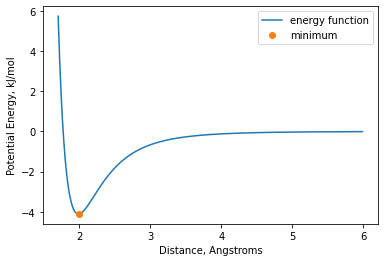

In [10]:
r = np.arange(1.7, 6, 0.01)
PE = PE_LJ(r)
plt.plot(r, PE, label='energy function')
plt.plot(opt.x, PE_LJ(opt.x), 'o', label='minimum')
plt.xlabel('Distance, Angstroms')
plt.ylabel('Potential Energy, kJ/mol')
plt.legend()
plt.savefig("./images/Lennard_jones_equation.pdf", dpi=400,  bbox_inches='tight')